# What Demographic Features Predict Violent Crime?

Sources:

California Violent Crime Rate 2000-2013 (by county) - https://data.ca.gov/dataset/violent-crime-rate

US Census Age & Sex Data 2000 - 2010 - https://www2.census.gov/programs-surveys/popest/datasets/2000-2010/intercensal/county/co-est00int-agesex-5yr.csv

US Census Racial Data 2000 - 2010 - https://www2.census.gov/programs-surveys/popest/datasets/2000-2010/intercensal/county/co-est00int-sexracehisp.csv

Data Dictionary for US Census Data - https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2000-2010/intercensal/county/

In [37]:
import seaborn as sns
import pandas as pd

## Import Violent Crime Data

In [5]:
#specify columns to import
violent_crime_cols = [
    'ind_definition',
    'reportyear', 
    'geotype', 
    'geoname', 
    'strata_level_name', 
    'numerator', 
    'denominator', 
    'rate', 
    'dof_population']

#read in data from Excel
violent_crime = pd.read_excel("hci_crime_752_pl_co_re_ca_2000-2013_21oct15-ada.xlsx",sheet_name='ViolentCrime'
                              , usecols=violent_crime_cols)

In [6]:
#preview of data
violent_crime.head()

,ind_definition,reportyear,geotype,geoname,strata_level_name,numerator,denominator,rate,dof_population
0,"Number of Violent Crimes per 1,000 Population",2000.0,CA,California,Aggravated assault,138325.0,33847694.0,NaN,33873086.0
1,"Number of Violent Crimes per 1,000 Population",2000.0,CA,California,Forcible rape,9784.0,33847694.0,NaN,33873086.0
2,"Number of Violent Crimes per 1,000 Population",2000.0,CA,California,Murder and non-negligent manslaughter,2079.0,33847694.0,NaN,33873086.0
3,"Number of Violent Crimes per 1,000 Population",2000.0,CA,California,Robbery,60237.0,33847694.0,NaN,33873086.0
4,"Number of Violent Crimes per 1,000 Population",2000.0,CA,California,Violent crime total,210448.0,33847694.0,6.217499,33873086.0


In [61]:
#Filter data
vc_filtered = violent_crime[(violent_crime.reportyear==2010.0) & (violent_crime.geotype == 'CO')]

In [62]:
vc_filtered.head()

,ind_definition,reportyear,geotype,geoname,strata_level_name,numerator,denominator,rate,dof_population
33915,"Number of Violent Crimes per 1,000 Population",2010.0,CO,Alameda,Aggravated assault,4942.0,1510271.0,NaN,1510271.0
33916,"Number of Violent Crimes per 1,000 Population",2010.0,CO,Alameda,Forcible rape,524.0,1510271.0,NaN,1510271.0
33917,"Number of Violent Crimes per 1,000 Population",2010.0,CO,Alameda,Murder and non-negligent manslaughter,132.0,1510271.0,NaN,1510271.0
33918,"Number of Violent Crimes per 1,000 Population",2010.0,CO,Alameda,Robbery,4870.0,1510271.0,NaN,1510271.0
33919,"Number of Violent Crimes per 1,000 Population",2010.0,CO,Alameda,Violent crime total,10468.0,1510271.0,6.931206,1510271.0


In [64]:
#calculate the rate for each  type of crime
vc_filtered['rate'] = (violent_crime_filtered['numerator'] / violent_crime_filtered['denominator']) * 1000

#rename the rate column
vc_filtered.rename({'rate': 'rate_per_1000'}, axis=1, inplace=True)  # new method

<ipython-input-64-1e1d69b6b77d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vc_filtered['rate'] = (violent_crime_filtered['numerator'] / violent_crime_filtered['denominator']) * 1000
C:\Users\Jordan-PC\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [65]:
vc_filtered.head()

,ind_definition,reportyear,geotype,geoname,strata_level_name,numerator,denominator,rate_per_1000,dof_population
33915,"Number of Violent Crimes per 1,000 Population",2010.0,CO,Alameda,Aggravated assault,4942.0,1510271.0,3.272260,1510271.0
33916,"Number of Violent Crimes per 1,000 Population",2010.0,CO,Alameda,Forcible rape,524.0,1510271.0,0.346958,1510271.0
33917,"Number of Violent Crimes per 1,000 Population",2010.0,CO,Alameda,Murder and non-negligent manslaughter,132.0,1510271.0,0.087402,1510271.0
33918,"Number of Violent Crimes per 1,000 Population",2010.0,CO,Alameda,Robbery,4870.0,1510271.0,3.224587,1510271.0
33919,"Number of Violent Crimes per 1,000 Population",2010.0,CO,Alameda,Violent crime total,10468.0,1510271.0,6.931206,1510271.0


<AxesSubplot:xlabel='rate_per_1000', ylabel='Count'>

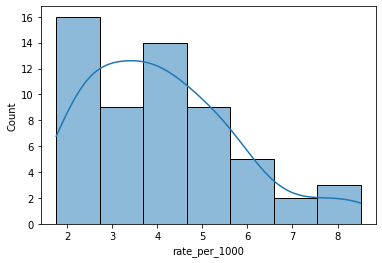

In [66]:
#Distribution of violent crimes by county
sns.histplot(vc_filtered[(vc_filtered.strata_level_name=='Violent crime total')]['rate_per_1000'], kde=True)

#### What county has the highest violent crime rate?

In [57]:
violent_crime_filtered[violent_crime_filtered.rate_per_1000 == violent_crime_filtered.rate_per_1000.max()]

,ind_definition,reportyear,geotype,geoname,strata_level_name,numerator,denominator,rate_per_1000,dof_population
33924,"Number of Violent Crimes per 1,000 Population",2010.0,CO,Alpine,Violent crime total,10.0,1175.0,8.510638,1175.0


## Import Census Demographic Data - Age & Sex

In [154]:
age_sex_columns = [
    'STNAME',
    'CTYNAME',
    'AGEGRP',
    'SEX',
    'CENSUS2010POP'
]
age_sex = pd.read_csv('co-est00int-agesex-5yr.csv', usecols=age_sex_columns, encoding = "ISO-8859-1")

In [155]:
age_sex.head()

,STNAME,CTYNAME,SEX,AGEGRP,CENSUS2010POP
0,Alabama,Autauga County,0,0,54571.0
1,Alabama,Autauga County,0,1,3579.0
2,Alabama,Autauga County,0,2,3991.0
3,Alabama,Autauga County,0,3,4290.0
4,Alabama,Autauga County,0,4,4290.0


In [156]:
#Filter out all other states besides California
age_sex = age_sex[(age_sex.STNAME=='California')]

In [157]:
age_sex.head()

,STNAME,CTYNAME,SEX,AGEGRP,CENSUS2010POP
10602,California,Alameda County,0,0,1510271.0
10603,California,Alameda County,0,1,97652.0
10604,California,Alameda County,0,2,94546.0
10605,California,Alameda County,0,3,91070.0
10606,California,Alameda County,0,4,100394.0


In [158]:
#Clean up County Name
age_sex['NEW_CTY_NAME'] = age_sex['CTYNAME'].str.replace('County', '')

In [159]:
#Filter out sex segregated rows, keep only age segregated data
age_only = age_sex[(age_sex.SEX==0) & (age_sex.AGEGRP > 0)]

In [166]:
age_only['TOTAL_POP'] = 0
for index,row in age_only.iterrows():
    #find total pop
    total_pop = age_sex[(age_sex.CTYNAME == row['CTYNAME']) & (age_sex.SEX == 0) & (age_sex.AGEGRP==0)]['CENSUS2010POP'].max()
    age_only.at[index, 'TOTAL_POP'] = total_pop
    #print (row['TOTAL_POP'])
age_only['POP_PROPORTION %'] = (age_only['CENSUS2010POP'] / age_only['TOTAL_POP'] * 100)

<ipython-input-166-af89d2896011>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_only['TOTAL_POP'] = 0
<ipython-input-166-af89d2896011>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_only['POP_PROPORTION %'] = (age_only['CENSUS2010POP'] / age_only['TOTAL_POP'] * 100)


In [167]:
age_only.head()

,STNAME,CTYNAME,SEX,AGEGRP,CENSUS2010POP,NEW_CTY_NAME,TOTAL_POP,POP_PROPORTION,POP_PROPORTION %
10603,California,Alameda County,0,1,97652.0,Alameda,1510271,0.064659,6.465859
10604,California,Alameda County,0,2,94546.0,Alameda,1510271,0.062602,6.260201
10605,California,Alameda County,0,3,91070.0,Alameda,1510271,0.060300,6.030044
10606,California,Alameda County,0,4,100394.0,Alameda,1510271,0.066474,6.647416
10607,California,Alameda County,0,5,107049.0,Alameda,1510271,0.070881,7.088066


<AxesSubplot:xlabel='CENSUS2010POP', ylabel='Count'>

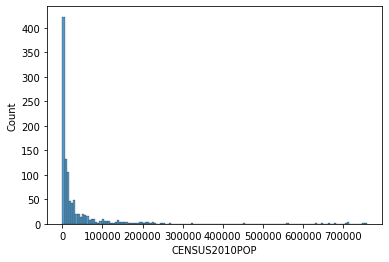

In [105]:
sns.histplot(age_only['CENSUS2010POP'])

In [150]:
age_only.head()

,STNAME,CTYNAME,SEX,AGEGRP,CENSUS2010POP,NEW_CTY_NAME,TOTAL_POP
10603,California,Alameda County,0,1,97652.0,Alameda,1510271
10604,California,Alameda County,0,2,94546.0,Alameda,1510271
10605,California,Alameda County,0,3,91070.0,Alameda,1510271
10606,California,Alameda County,0,4,100394.0,Alameda,1510271
10607,California,Alameda County,0,5,107049.0,Alameda,1510271


In [148]:
age_only.head()

,STNAME,CTYNAME,SEX,AGEGRP,CENSUS2010POP,NEW_CTY_NAME,TOTAL_POP
10603,California,Alameda County,0,1,97652.0,Alameda,1
10604,California,Alameda County,0,2,94546.0,Alameda,1
10605,California,Alameda County,0,3,91070.0,Alameda,1
10606,California,Alameda County,0,4,100394.0,Alameda,1
10607,California,Alameda County,0,5,107049.0,Alameda,1
